# <center>Sentiment Analyser</center>

## Dataset Information

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally , given a training sample of tweets and labels, where label '1' denotes a negative sentiment tweet( racist/sexist) and label '0' denotes a positive sentiment tweet (not racist/sexist) . Our objective is to predict the labels on the test dataset.

For training the models we have a labelled dataset of 31962 different tweets. The dataset is in the form of a csv file with each line storing a tweet id, its label and the tweet

## Importing Modules

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import warnings
import string
%matplotlib inline

warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('train_sent.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing the Dataset

In [40]:
#removes pattern
def remove_pattern(inp_txt,pattern):
    r = re.findall(pattern,inp_txt)
    for word in r:
        inp_txt = re.sub(word, "",inp_txt)
    return inp_txt    

In [41]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*") # removing twitter handles
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ") #removing special characters(apostrophe,comma etc.)
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3])) #removing short/common words
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [42]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split()) #Tokenizing the tweet

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(word) for word in x]) #stemming the words
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [43]:
#combining everything
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

#updating the clean tweet column
df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


## Exploratory Data Analysis

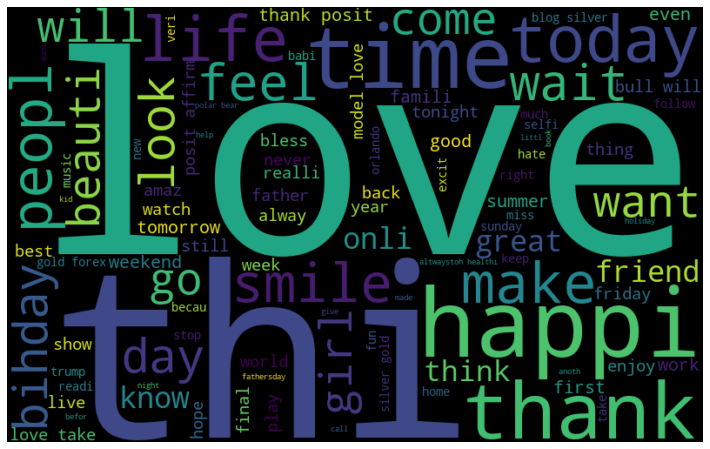

In [44]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
font_path = r"C:\Users\dhruv\SLC_.ttf"
wc = WordCloud(width=800, height=500, random_state=42, max_words=100).generate(all_words) #wordcloud for all words

#plotting
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

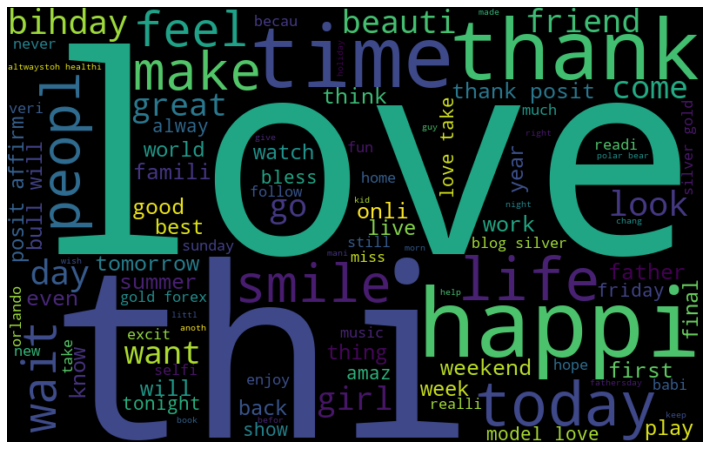

In [45]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
from wordcloud import WordCloud
font_path = r"C:\Users\dhruv\SLC_.ttf"
wc = WordCloud(width=800, height=500, random_state=42, max_words=100).generate(all_words) #wordcloud for positive words

#plotting
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

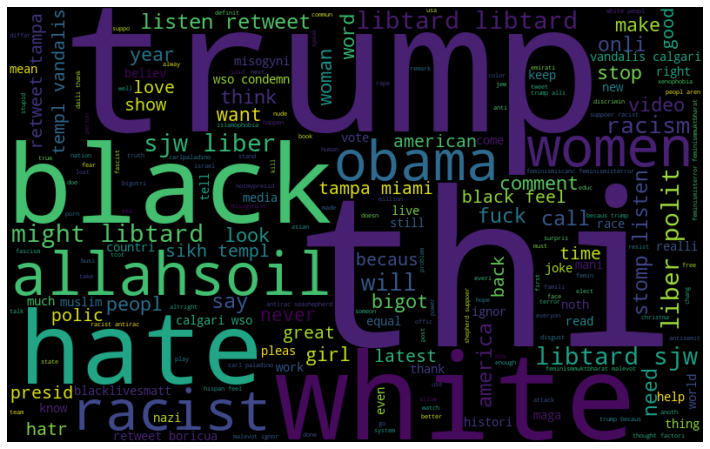

In [46]:
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
from wordcloud import WordCloud
font_path = r"C:\Users\dhruv\SLC_.ttf"
wc = WordCloud(width=800, height=500, random_state=42, max_words=200).generate(all_words) #wordcloud for negative words

#plotting
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
#fetching the tweet hashtags
def hashtag_ext(tweet):
    hashtags = []
    for tw in tweet:
        ht = re.findall(r"#(\w+)",tw)
        hashtags.append(ht)
    return hashtags    

In [48]:
ht_pos = hashtag_ext(df['clean_tweet'][df['label']==0]) # fetching from positive tweets
ht_neg = hashtag_ext(df['clean_tweet'][df['label']==1]) # fetching from negative tweets

In [49]:
ht_pos

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [50]:
ht_neg

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

In [51]:
#unnesting 
ht_pos = sum(ht_pos,[])
ht_neg = sum(ht_neg,[])

In [52]:
ht_pos[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [53]:
freq = nltk.FreqDist(ht_pos)
d1 = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d1.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

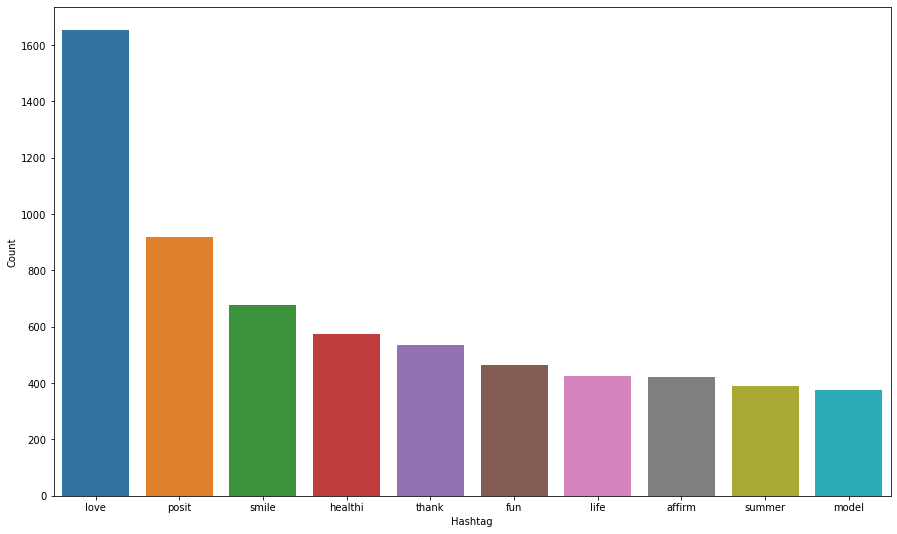

In [54]:
#top 10 most used hashtags(positive)
d1= d1.nlargest(columns ='Count', n=10)
plt.figure(figsize = (15,9))
sns.barplot(data = d1, x = "Hashtag", y = "Count")

In [55]:
freq = nltk.FreqDist(ht_neg)
d1 = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d1.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

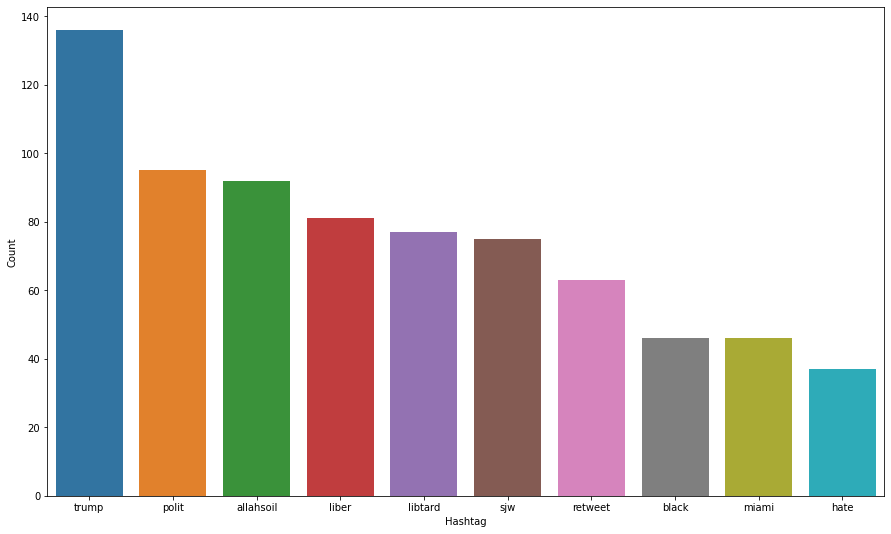

In [56]:
#top 10 most used hashtags(negative)
d1= d1.nlargest(columns ='Count', n=10)
plt.figure(figsize = (15,9))
sns.barplot(data = d1, x = "Hashtag", y = "Count")

## Splitting the Data

In [57]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow , df['label'],random_state = 42,test_size= 0.25)

## Model Training

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score,accuracy_score

### Logistic Regression

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [25]:
pred = model.predict(x_test)
f1_score(y_test,pred)

0.49763033175355453

In [26]:
accuracy_score(y_test,pred)

0.9469403078463271

### Multinomial Naive Bayes

In [27]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [28]:
pred = model.predict(x_test)
f1_score(y_test,pred)

0.5344202898550724

In [29]:
accuracy_score(y_test,pred)

0.9356776373420098

### Support Vector Classifier

In [30]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [31]:
pred = model.predict(x_test)
f1_score(y_test,pred)

0.4747474747474748

In [32]:
accuracy_score(y_test,pred)

0.9479414341133775

## Conclusion

From the above analysis we observed the following accuracies

##### Logistic Regression ---> 94.6%

##### Multinomial Naive Bayes ---> 93.5%

##### Support Vector Classifier ---> 94.7%

### From this we can conclude that Support Vector Classifier has the best accuracy among all the other algorithms in the list, therefore it should be the preferred choice for making our predictions

In [61]:
# saving the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [62]:
load_model = pickle.load(open(filename, 'rb'))

In [63]:
!pip install flask